In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as xrio
import geopandas as gpd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.set_printoptions(linewidth=200)

<h1>Rain</h1>

In [3]:
rain_data = xrio.open_rasterio("data2\\annual_rain.tif")

print(rain_data)
rain_data

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        2824.7434082031
    STATISTICS_MEAN:           498.79483239204
    STATISTICS_MINIMUM:        163.73666381836
    STATISTICS_STDDEV:         271.78600853487
    STATISTICS_VALID_PERCENT:  81.55
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0


<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        2824.7434082031
    STATISTICS_MEAN:           498.79483239204
    STATISTICS_MINIMUM:        163.73666381836
    STATISTICS_STDDEV:         271.78600853487
    STATISTICS_VALID_PERCENT:  81.55
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0

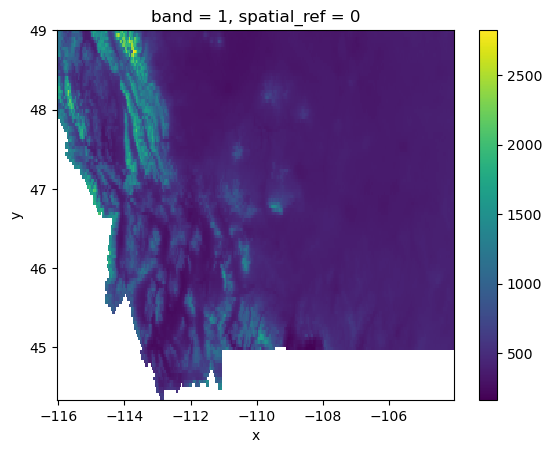

In [4]:
rain_data.plot()

<h1>Temp</h1>

In [5]:
tmin_data = xrio.open_rasterio("data2\\annual_tmin.tif")
print(tmin_data)
# tmin_data

tmax_data = xrio.open_rasterio("data2\\annual_tmin.tif")
print(tmax_data)
# tmax_data

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        276.67013549805
    STATISTICS_MEAN:           272.32652699707
    STATISTICS_MINIMUM:        263.47247314453
    STATISTICS_STDDEV:         1.4713366231669
    STATISTICS_VALID_PERCENT:  81.53
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0
<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
[32256 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
  

In [6]:
#K to F
data_fahrenheit_min = (tmin_data - 273.15) * 9/5 + 32

data_fahrenheit_min.attrs = tmin_data.attrs
data_fahrenheit_min.attrs['units'] = 'Fahrenheit'

# data_fahrenheit_min


data_fahrenheit_max = (tmax_data - 273.15) * 9/5 + 32

data_fahrenheit_max.attrs = tmax_data.attrs
data_fahrenheit_max.attrs['units'] = 'Fahrenheit'

# data_fahrenheit_max

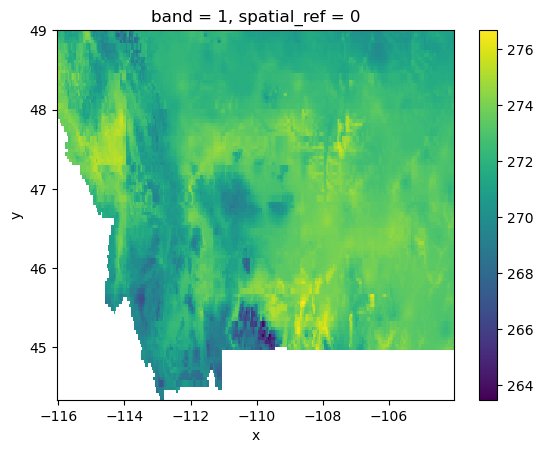

In [7]:
tmin_data.plot()

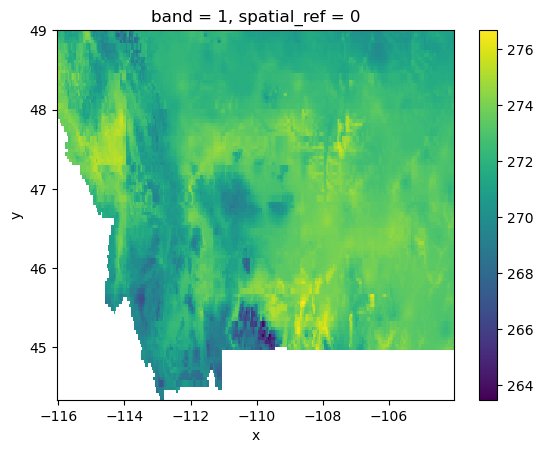

In [8]:
tmax_data.plot()

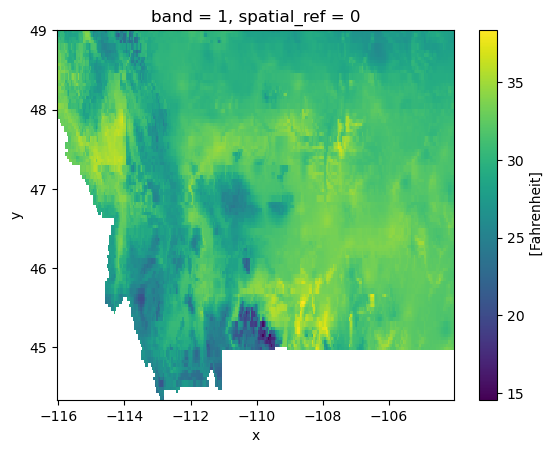

In [9]:
data_fahrenheit_max.plot()

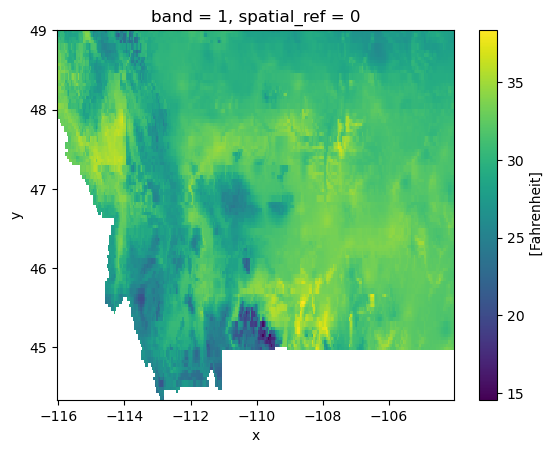

In [10]:
data_fahrenheit_min.plot()

In [11]:
tcomb_data = (data_fahrenheit_min + data_fahrenheit_max)/2
tcomb_data

<xarray.DataArray (band: 1, y: 112, x: 288)> Size: 129kB
array([[[30.287395, 29.181732, 29.8146  , ..., 27.95725 , 27.870295, 27.825085],
        [29.936987, 28.976452, 30.360235, ..., 27.847279, 27.77658 , 27.727636],
        [30.298054, 30.198406, 29.884144, ..., 27.7651  , 27.68847 , 27.631725],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,       nan],
        [      nan,       nan,       nan, ...,       nan,       nan,       nan],
        [      nan,       nan,       nan, ...,       nan,       nan,       nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 896B 48.98 48.94 48.9 48.86 ... 44.44 44.4 44.36
    spatial_ref  int64 8B 0

<h1>NDVI</h1>

In [12]:
ndvi_data = xrio.open_rasterio("data2\\ndvi_final.tif")

print(ndvi_data)
ndvi_data

<xarray.DataArray (band: 1, y: 110, x: 288)> Size: 127kB
[31680 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 880B 48.94 48.9 48.86 48.82 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0


<xarray.DataArray (band: 1, y: 110, x: 288)> Size: 127kB
[31680 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 880B 48.94 48.9 48.86 48.82 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

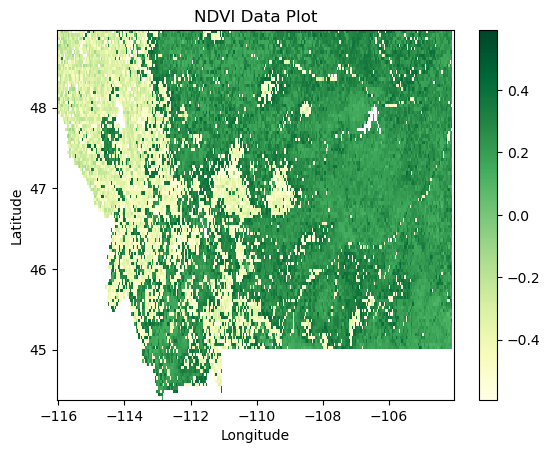

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ndvi_data = ndvi_data.where(ndvi_data != ndvi_data.attrs['_FillValue'], np.nan)

ndvi_data.plot(x='x', y='y', cmap='YlGn')
plt.title("NDVI Data Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<h1>Pop Dens</h1>

In [14]:
pop_data = xrio.open_rasterio("data2\popdens.tif")

print(pop_data)
pop_data

<xarray.DataArray (band: 1, y: 111, x: 288)> Size: 128kB
[31968 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 888B 48.98 48.94 48.9 48.85 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.230102647606
    STATISTICS_VALID_PERCENT:  81.25
    _FillValue:                -3.402823e+38
    scale_factor:              1.0
    add_offset:                0.0


<xarray.DataArray (band: 1, y: 111, x: 288)> Size: 128kB
[31968 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 888B 48.98 48.94 48.9 48.85 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.230102647606
    STATISTICS_VALID_PERCENT:  81.25
    _FillValue:                -3.402823e+38
    scale_factor:              1.0
    add_offset:                0.0

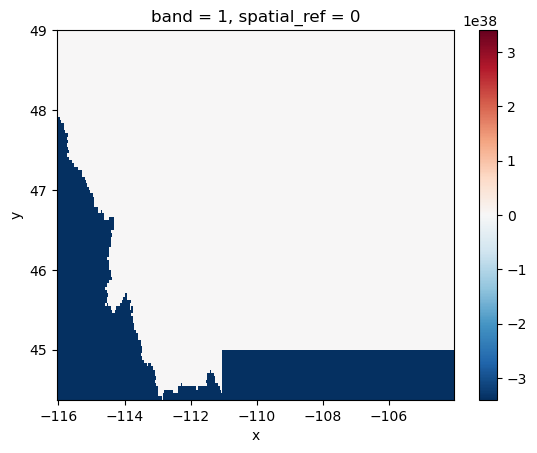

In [15]:
pop_data.plot()

In [16]:
print("Total non-NaN values in pop_data:", np.sum(~np.isnan(pop_data.values)))

Total non-NaN values in pop_data: 31968


c:\Users\Alex\anaconda3\envs\rast_env\Lib\site-packages\xarray\core\computation.py:818: RuntimeWarning: invalid value encountered in log1p
  result_data = func(*input_data)


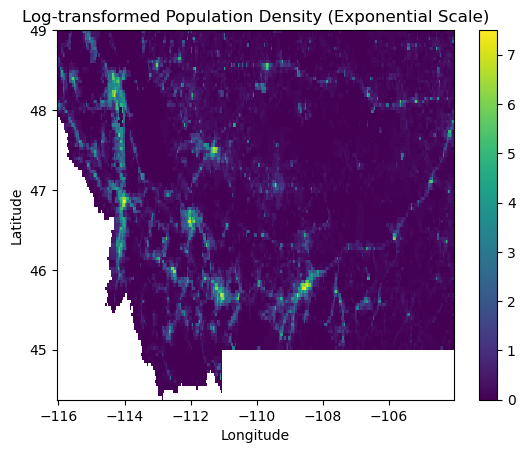

In [17]:
# Apply a logarithmic transformation to the data
# Adding a small value (e.g., 1) to avoid log(0) if there are zero values in the data
log_pop_data = np.log1p(pop_data)  # np.log1p is log(x + 1), safer for 0 values

# Plot the transformed data using a colormap
log_pop_data.plot(cmap='viridis', add_colorbar=True)

# Add titles and labels
plt.title("Log-transformed Population Density (Exponential Scale)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [18]:
log_pop_data

<xarray.DataArray (band: 1, y: 111, x: 288)> Size: 128kB
array([[[0.        , 0.        , 0.        , ..., 0.29844722, 0.11051268, 0.08366855],
        [0.00968505, 0.        , 0.        , ..., 0.17213586, 0.11854688, 0.12753466],
        [0.04897361, 0.02121452, 0.        , ..., 0.34497008, 0.16159612, 0.8752619 ],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan],
        [       nan,        nan,        nan, ...,        nan,        nan,        nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 888B 48.98 48.94 48.9 48.85 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:        1804.8670654297
    STATISTICS_MEAN:           2.9575220193198
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         34.230102647606
    STATISTICS_VALID_PERCENT:  81.25
    _FillValue:                -3.402823e+38
    scale_factor:              1.0
    add_offset:                0.0

In [19]:
print("Total non-NaN values in log_pop_data:", np.sum(~np.isnan(log_pop_data.values)))


Total non-NaN values in log_pop_data: 25975


<h1>Merge attempts</h1>

In [20]:
combined_data = xr.merge([
    ndvi_data.rename("ndvi"),
    tcomb_data.rename("tcomb"),
    rain_data.rename("rain")
])
combined_data

<xarray.Dataset> Size: 2MB
Dimensions:      (band: 1, x: 576, y: 222)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0
Data variables:
    ndvi         (band, y, x) float32 511kB nan nan nan nan ... nan nan nan nan
    tcomb        (band, y, x) float32 511kB nan nan nan nan ... 27.87 nan 27.83
    rain         (band, y, x) float32 511kB nan nan nan nan ... 392.0 nan 386.6
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

In [21]:
ndvi_data

<xarray.DataArray (band: 1, y: 110, x: 288)> Size: 127kB
array([[[ 0.3  , -0.444, -0.252, ...,  0.208,  0.36 ,    nan],
        [-0.3  , -0.38 , -0.264, ...,  0.204,  0.296,    nan],
        [-0.272, -0.248,    nan, ...,  0.248,  0.316,    nan],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB -116.0 -116.0 -115.9 ... -104.1 -104.1 -104.1
  * y            (y) float64 880B 48.94 48.9 48.86 48.82 ... 44.48 44.44 44.4
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

<h1>Random Forest</h1>

In [22]:
import numpy as np
import xarray as xr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
# Extract data variables from the combined_dataset
ndvi_data2 = combined_data['ndvi'].squeeze()  # Remove the singleton 'band' dimension
tcomb_data2 = combined_data['tcomb'].squeeze()
rain_data2 = combined_data['rain'].squeeze()

In [24]:
ndvi_data2

<xarray.DataArray 'ndvi' (y: 222, x: 576)> Size: 511kB
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [ 0.3  ,    nan, -0.444, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        0.42800000309944
    STATISTICS_MEAN:           0.073344168064892
    STATISTICS_MINIMUM:        -0.59200000762939
    STATISTICS_STDDEV:         0.31341878736657
    STATISTICS_VALID_PERCENT:  80.02
    _FillValue:                -3.4028235e+38
    scale_factor:              1.0
    add_offset:                0.0

In [25]:
tcomb_data2

<xarray.DataArray 'tcomb' (y: 222, x: 576)> Size: 511kB
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [      nan, 29.936987,       nan, ..., 27.77658 ,       nan, 27.727636],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan, 30.287395,       nan, ..., 27.870295,       nan, 27.825085]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0

In [26]:
rain_data2

<xarray.DataArray 'rain' (y: 222, x: 576)> Size: 511kB
array([[       nan,        nan,        nan, ...,        nan,        nan,        nan],
       [       nan,        nan,        nan, ...,        nan,        nan,        nan],
       [       nan,        nan,        nan, ...,        nan,        nan,        nan],
       ...,
       [       nan, 1083.34   ,        nan, ...,  377.16666,        nan,  371.31332],
       [       nan,        nan,        nan, ...,        nan,        nan,        nan],
       [       nan,  990.07   ,        nan, ...,  391.97   ,        nan,  386.58334]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 5kB -116.0 -116.0 -116.0 ... -104.1 -104.1 -104.1
  * y            (y) float64 2kB 44.36 44.4 44.4 44.44 ... 48.94 48.94 48.98
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        2824.7434082031
    STATISTICS_MEAN:           498.79483239204
    STATISTICS_MINIMUM:        163.73666381836
    STATISTICS_STDDEV:         271.78600853487
    STATISTICS_VALID_PERCENT:  81.55
    _FillValue:                nan
    scale_factor:              1.0
    add_offset:                0.0

ATT 5

In [27]:
#print shapes
print("NDVI Shape:", ndvi_data.shape)
print("Tcomb Shape:", tcomb_data.shape)
print("Rain Shape:", rain_data.shape)
print("Population Data Shape:", log_pop_data.shape)

NDVI Shape: (1, 110, 288)
Tcomb Shape: (1, 112, 288)
Rain Shape: (1, 112, 288)
Population Data Shape: (1, 111, 288)


In [28]:
# Interpolate all data to match the dimensions of Tcomb
target_shape = tcomb_data.shape

ndvi_data_resampled = ndvi_data.interp(y=tcomb_data.coords['y'])
log_pop_data_resampled = log_pop_data.interp(y=tcomb_data.coords['y'])
rain_data_resampled = rain_data.interp(y=tcomb_data.coords['y'])

In [29]:
#verify shapes
print("Resampled NDVI Shape:", ndvi_data_resampled.shape)
print("Resampled Population Shape:", log_pop_data_resampled.shape)
print("Resampled Rain Shape:", rain_data_resampled.shape)
print("Tcomb Shape:", tcomb_data.shape)

Resampled NDVI Shape: (1, 112, 288)
Resampled Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)
Tcomb Shape: (1, 112, 288)


In [30]:
# Flatten all data arrays
X2 = np.stack([ndvi_data_resampled.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_resampled.values.flatten()], axis=1)

# Flatten population data as target variable
y2 = log_pop_data_resampled.values.flatten()

# Remove NaN values from X and y for training
mask2 = ~np.isnan(y2)
X_train2 = X2[mask2]
y_train2 = y2[mask2]

# Verify the shapes of the training data
print("X2_train shape:", X_train2.shape)
print("y2_train shape:", y_train2.shape)

X2_train shape: (25665, 3)
y2_train shape: (25665,)


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Initialize the Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

# Make predictions on the training data (you can use test data if available)
y_pred2 = model2.predict(X_train2)


print("R^2 Score:", r2_score(y_train2, y_pred2))
print("Number of predictions:", len(y_pred2))

R^2 Score: 0.8875699520990729
Number of predictions: 25665


In [33]:
# Create a full grid of NaNs (matching the desired target grid size)
prediction_grid2 = np.full((tcomb_data.shape[1], tcomb_data.shape[2]), np.nan)

# Check the size of the predictions
target_size2 = tcomb_data.shape[1] * tcomb_data.shape[2]


# Since len(y_pred) is smaller than target_size (31680 vs. 32256), we will pad with NaNs
if len(y_pred2) == target_size2:
    # If sizes match, reshape directly
    prediction_grid2 = y_pred2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])
else:
    # If sizes don't match, fill the prediction grid with values where possible
    print(f"Warning: Mismatch in array sizes. Expected {target_size2} values, but got {len(y_pred2)}.")
    # Flatten the prediction grid to insert the predictions
    prediction_grid_flat2 = prediction_grid2.flatten()
    
    # Insert the predictions where the mask allows
    prediction_grid_flat2[:len(y_pred2)] = y_pred2  # Insert only the available predictions
    
    # Reshape back to the target grid shape
    prediction_grid2 = prediction_grid_flat2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])

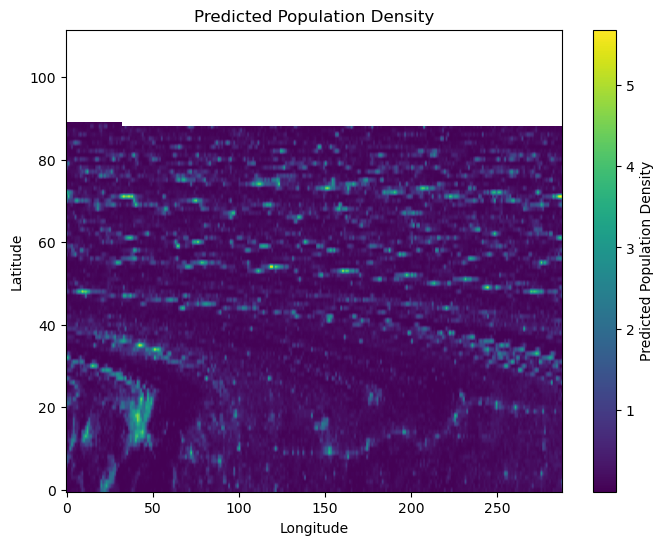

In [34]:
# Plot the flipped grid
plt.figure(figsize=(8, 6))
plt.imshow(prediction_grid2, cmap='viridis', origin='lower')  # 'lower' sets the origin to bottom-left
plt.colorbar(label='Predicted Population Density')
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust aspect ratio
plt.gca().set_aspect('auto')

plt.show()


In [35]:
feature_importances = model2.feature_importances_
features = ['NDVI', 'Tcomb', 'Rain']  # Adjust based on actual feature names

# Create a DataFrame for easier interpretation
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

  Feature  Importance
1   Tcomb    0.366884
2    Rain    0.329228
0    NDVI    0.303888


all

NDVI Shape: (1, 110, 288)
Tcomb Shape: (1, 112, 288)
Rain Shape: (1, 112, 288)
Population Data Shape: (1, 111, 288)
Resampled NDVI Shape: (1, 112, 288)
Resampled Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)
Tcomb Shape: (1, 112, 288)
X2_train shape: (25665, 3)
y2_train shape: (25665,)
R^2 Score: 0.8875699520990729
Number of predictions: 25665


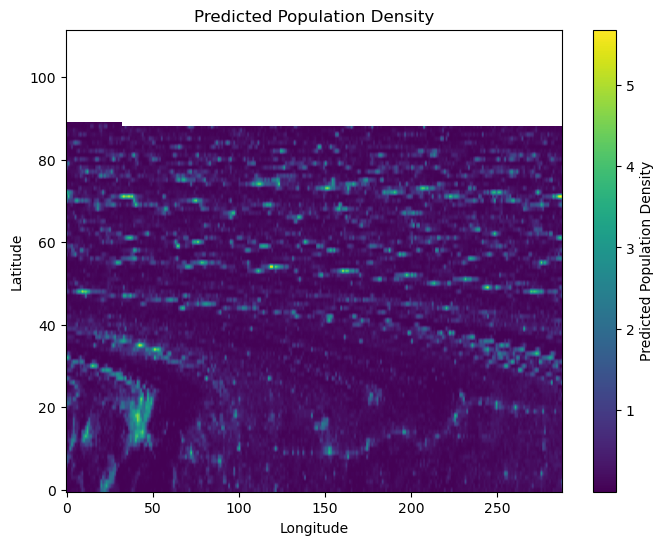

In [36]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Verify shapes
print("NDVI Shape:", ndvi_data.shape)
print("Tcomb Shape:", tcomb_data.shape)
print("Rain Shape:", rain_data.shape)
print("Population Data Shape:", log_pop_data.shape)

# Interpolate all data to match the dimensions of Tcomb
target_shape = tcomb_data.shape
ndvi_data_resampled = ndvi_data.interp(y=tcomb_data.coords['y'])
log_pop_data_resampled = log_pop_data.interp(y=tcomb_data.coords['y'])
rain_data_resampled = rain_data.interp(y=tcomb_data.coords['y'])

# Verify shapes after interpolation
print("Resampled NDVI Shape:", ndvi_data_resampled.shape)
print("Resampled Population Shape:", log_pop_data_resampled.shape)
print("Resampled Rain Shape:", rain_data_resampled.shape)
print("Tcomb Shape:", tcomb_data.shape)

# Flatten all data arrays
X2 = np.stack([ndvi_data_resampled.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_resampled.values.flatten()], axis=1)

# Flatten population data as target variable
y2 = log_pop_data_resampled.values.flatten()

# Remove NaN values from X and y for training
mask2 = ~np.isnan(y2)
X_train2 = X2[mask2]
y_train2 = y2[mask2]

# Verify the shapes of the training data
print("X2_train shape:", X_train2.shape)
print("y2_train shape:", y_train2.shape)

# Initialize the Random Forest Regressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

# Make predictions on the training data (you can use test data if available)
y_pred2 = model2.predict(X_train2)

print("R^2 Score:", r2_score(y_train2, y_pred2))
print("Number of predictions:", len(y_pred2))

# Ensure that we handle NaNs in the grid and the predictions
prediction_grid2 = np.full((tcomb_data.shape[1], tcomb_data.shape[2]), np.nan)

# Check the size of the predictions
target_size2 = tcomb_data.shape[1] * tcomb_data.shape[2]

# Ensure we match the prediction size and handle the mismatch
if len(y_pred2) == target_size2:
    # If sizes match, reshape directly
    prediction_grid2 = y_pred2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])
else:
    # If sizes don't match, pad with NaNs
    print(f"Warning: Mismatch in array sizes. Expected {target_size2} values, but got {len(y_pred2)}.")
    
    # Flatten the prediction grid
    prediction_grid_flat2 = prediction_grid2.flatten()

    # Insert only the available predictions (we only have 25665 predictions)
    prediction_grid_flat2[:len(y_pred2)] = y_pred2  # Insert the available predictions

    # Reshape the prediction grid back to match the target grid shape
    prediction_grid2 = prediction_grid_flat2.reshape(tcomb_data.shape[1], tcomb_data.shape[2])

# Plot the prediction grid with the flipped origin
plt.figure(figsize=(8, 6))
plt.imshow(prediction_grid2, cmap='viridis', origin='lower')  # 'lower' sets the origin to bottom-left
plt.colorbar(label='Predicted Population Density')
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust aspect ratio
plt.gca().set_aspect('auto')

plt.show()


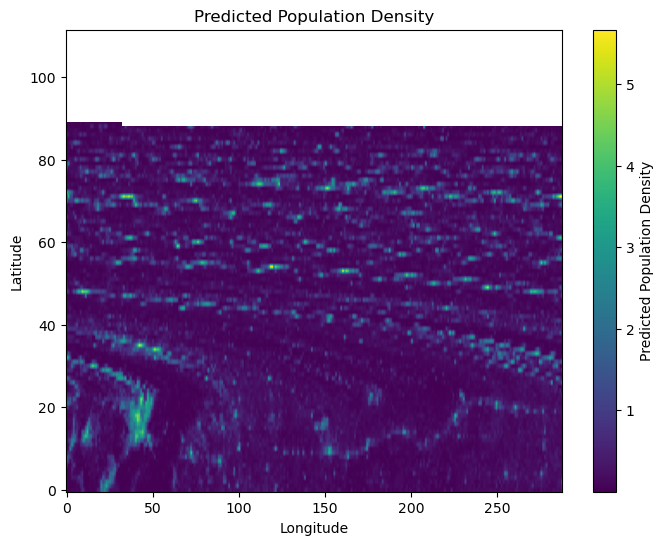

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mask NaN values in the prediction grid (if any) and plot the result
plt.figure(figsize=(8, 6))

# Use np.ma.masked_where to mask NaN values in the prediction grid
masked_grid = np.ma.masked_where(np.isnan(prediction_grid2), prediction_grid2)

# Plot the masked prediction grid
plt.imshow(masked_grid, cmap='viridis', origin='lower', aspect='auto')

# Add color bar to indicate predicted values
plt.colorbar(label='Predicted Population Density')

# Title and axis labels
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust the aspect ratio to match the data dimensions
plt.gca().set_aspect('auto')

# Show the plot
plt.show()


Att 6

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [59]:
#print shapes
print("NDVI Shape:", ndvi_data.shape)
print("Tcomb Shape:", tcomb_data.shape)
print("Rain Shape:", rain_data.shape)
print("log Population Data Shape:", log_pop_data.shape)

NDVI Shape: (1, 110, 288)
Tcomb Shape: (1, 112, 288)
Rain Shape: (1, 112, 288)
log Population Data Shape: (1, 111, 288)


In [57]:
# Interpolate all data to match the dimensions of Tcomb
target_s = tcomb_data.shape
ndvi_data_re = ndvi_data.interp(y=tcomb_data.coords['y'])
log_pop_data_re = log_pop_data.interp(y=tcomb_data.coords['y'])
rain_data_re = rain_data.interp(y=tcomb_data.coords['y'])

# Verify shapes after interpolation
print("Resampled NDVI Shape:", ndvi_data_re.shape)
print("Resampled log Population Shape:", log_pop_data_re.shape)
print("Resampled Rain Shape:", rain_data_re.shape)
print("Tcomb Shape:", tcomb_data.shape)

Resampled NDVI Shape: (1, 112, 288)
Resampled log Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)
Tcomb Shape: (1, 112, 288)


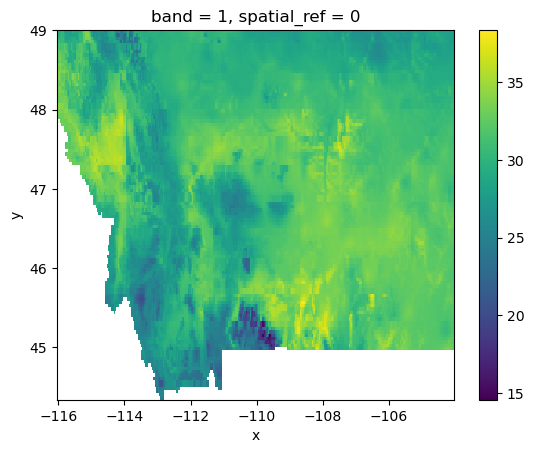

In [41]:
tcomb_data.plot()

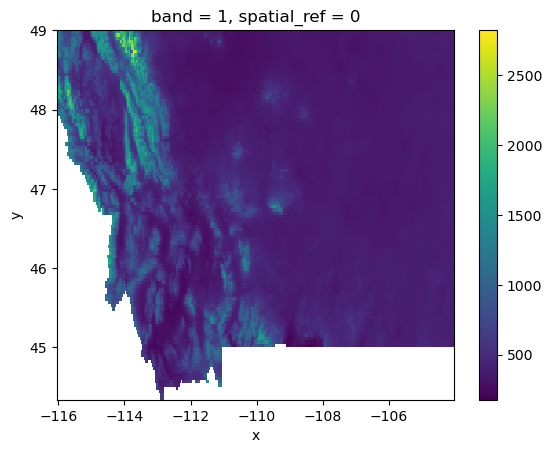

In [42]:
rain_data_re.plot()

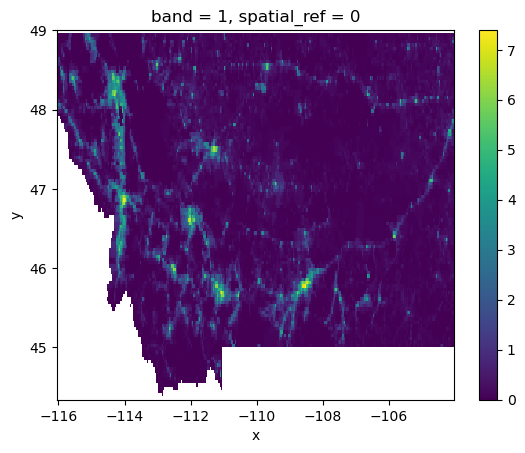

In [43]:
log_pop_data_re.plot()

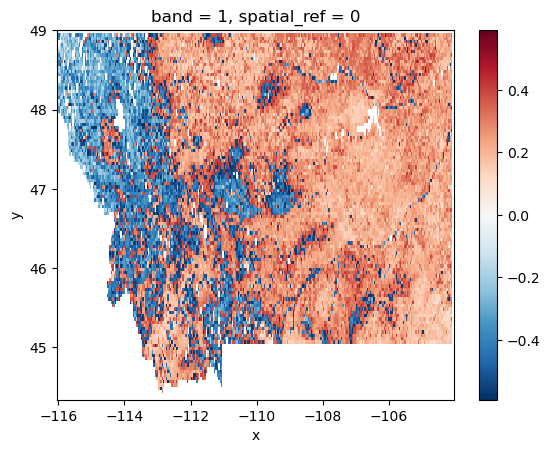

In [56]:
ndvi_data_re.plot()

In [47]:
#Flatten x data arrays
X3 = np.stack([ndvi_data_re.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_re.values.flatten()], axis=1)
X3

array([[          nan,   30.28739548,  990.07000732],
       [          nan,   29.18173218, 1159.7767334 ],
       [          nan,   29.81459999, 1139.51000977],
       ...,
       [          nan,           nan,           nan],
       [          nan,           nan,           nan],
       [          nan,           nan,           nan]])

In [51]:
y3 = log_pop_data_re.values.flatten()
y3

array([nan, nan, nan, ..., nan, nan, nan])

In [65]:
# Check for NaN values and remove them
valid_indices = ~np.isnan(y3)
X3_valid = X3[valid_indices]
y3_valid = y3[valid_indices]

# Split data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_valid, y3_valid, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model3.fit(X_train3, y_train3)

# Make predictions
y_pred3 = rf_model3.predict(X_test3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)
print("Number of predictions:", len(y_pred3))

Mean Squared Error: 0.44394360386071763
Number of predictions: 5133


In [ ]:
# Check if y_pred3 has the same total number of elements as the Montana grid shape
expected_size = combined_data.sizes["x"] * combined_data.sizes["y"] * combined_data.sizes["band"]
actual_size = y_pred3.size

print(expected_size)
print(actual_size)

127872
5133


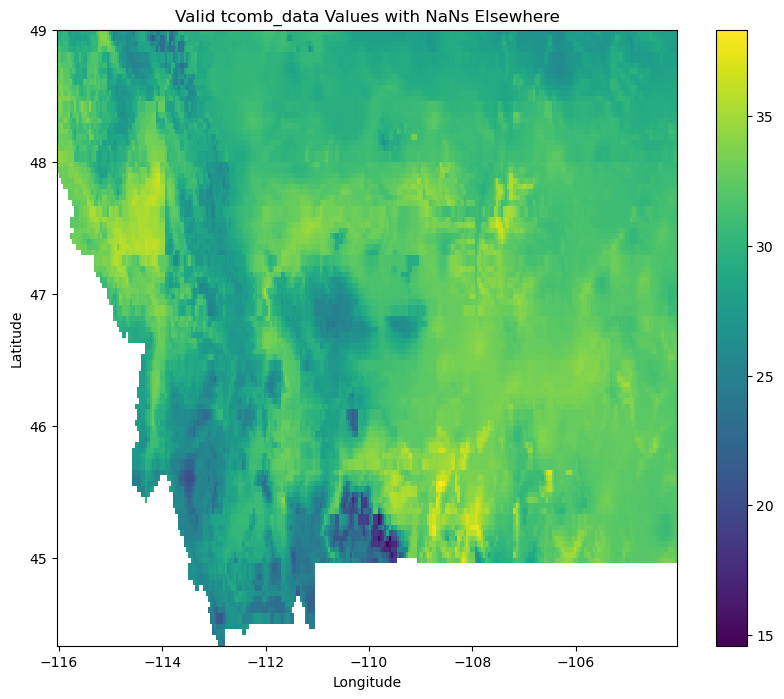

In [70]:
import numpy as np
import xarray as xr

# Step 1: Create a grid of NaNs, preserving the band dimension
nan_grid = np.full_like(tcomb_data.values, np.nan)

# Step 2: Create a mask for valid data (non-NaN values)
valid_data_mask = ~np.isnan(tcomb_data.values)

# Step 3: Apply the valid data mask to insert valid values into the nan_grid
nan_grid[valid_data_mask] = tcomb_data.values[valid_data_mask]

# Step 4: Create an xarray with the NaN-filled grid, keeping the band dimension
nan_xarray = xr.DataArray(nan_grid, dims=("band", "y", "x"), coords={"x": tcomb_data.coords["x"], "y": tcomb_data.coords["y"], "band": tcomb_data.coords["band"]})

# Optionally, plot the result (plot the first band)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
nan_xarray.isel(band=0).plot(cmap="viridis")  # Plot the first band (assuming the band dimension exists)
plt.title("Valid tcomb_data Values with NaNs Elsewhere")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


pain

In [78]:
# Print shapes to confirm dimensions
print("NDVI Shape:", combined_data['ndvi'].shape)
print("Tcomb Shape:", combined_data['tcomb'].shape)
print("Rain Shape:", combined_data['rain'].shape)
print("Population Data Shape:", pop_data.shape)


NDVI Shape: (1, 222, 576)
Tcomb Shape: (1, 222, 576)
Rain Shape: (1, 222, 576)
Population Data Shape: (1, 111, 288)


In [83]:
# Interpolate all data to match the dimensions of Tcomb
target_shape = tcomb_data.shape  # (1, 112, 288)

# Interpolate the data arrays
ndvi_data_resampled = ndvi_data.interp(y=tcomb_data.coords['y'])
pop_data_resampled = pop_data.interp(y=tcomb_data.coords['y'])
rain_data_resampled = rain_data.interp(y=tcomb_data.coords['y'])

print("Resampled NDVI Shape:", ndvi_data_resampled.shape)
print("Resampled Population Shape:", pop_data_resampled.shape)
print("Resampled Rain Shape:", rain_data_resampled.shape)



Resampled NDVI Shape: (1, 112, 288)
Resampled Population Shape: (1, 112, 288)
Resampled Rain Shape: (1, 112, 288)


In [84]:
# Flatten all data arrays
X = np.stack([ndvi_data_resampled.values.flatten(), 
              tcomb_data.values.flatten(), 
              rain_data_resampled.values.flatten()], axis=1)

# Flatten population data as target variable
y = pop_data_resampled.values.flatten()

# Remove NaN values from X and y for training
mask = ~np.isnan(y)
X_train = X[mask]
y_train = y[mask]

# Verify the shapes of the training data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (31680, 3)
y_train shape: (31680,)


In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred = model.predict(X_train)
print("R^2 Score:", r2_score(y_train, y_pred))


R^2 Score: 0.9969589124088305


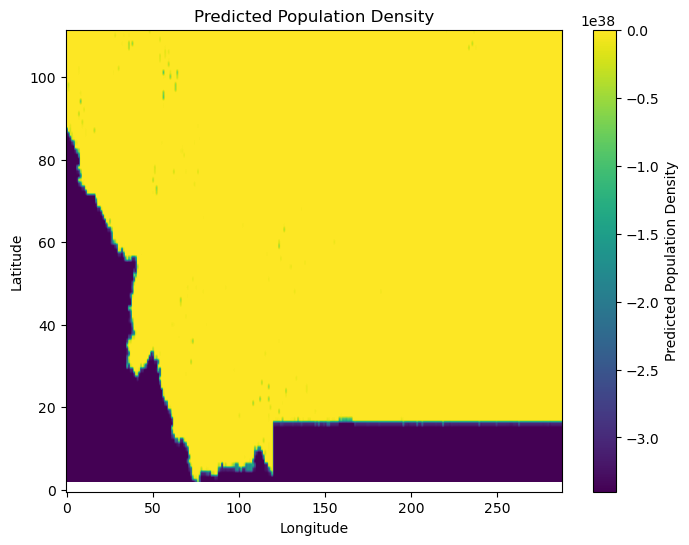

In [91]:
# Check that the number of predictions matches the expected grid size
expected_size = tcomb_data.shape[1] * tcomb_data.shape[2]  # 112 * 288 = 32,256
actual_size = len(y_pred)

if actual_size == expected_size:
    # Reshape predictions back into the original grid shape
    prediction_grid = y_pred.reshape(tcomb_data.shape[1], tcomb_data.shape[2])
else:
    # If sizes don’t match, fill with NaN in missing places
    print(f"Warning: Expected {expected_size} values, but got {actual_size}.")
    prediction_grid = np.full((tcomb_data.shape[1], tcomb_data.shape[2]), np.nan)
    prediction_grid.flat[:actual_size] = y_pred

# Flip the prediction grid vertically to match the correct orientation
prediction_grid_flipped = np.flipud(prediction_grid)

# Plot the flipped grid
plt.figure(figsize=(8, 6))
plt.imshow(prediction_grid_flipped, cmap='viridis', origin='lower')  # 'lower' sets the origin to bottom-left
plt.colorbar(label='Predicted Population Density')
plt.title('Predicted Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust aspect ratio
plt.gca().set_aspect('auto')

plt.show()


who do i need to sell my soul to